**Tools - pandas**

From the **Handson Machine Learning**  Book.  A Gueron.  (O'Reilly)

*The `pandas` library provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the `DataFrame`, which you can think of as an in-memory 2D table (like a spreadsheet, with column names and row labels). Many features available in Excel are available programmatically, such as creating pivot tables, computing columns based on other columns, plotting graphs, etc. You can also group rows by column value, or join tables much like in SQL. Pandas is also great at handling time series.*

Prerequisites:
* NumPy – if you are not familiar with NumPy, we recommend that you go through the [NumPy tutorial](tools_numpy.ipynb) now.

# Setup
First, let's make sure this notebook works well in both python 2 and 3:

Now let's import `pandas`. People usually import it as `pd`:

In [ ]:
import pandas as pd

# `Series` objects
The `pandas` library contains these useful data structures:
* `Series` objects, that we will discuss now. A `Series` object is 1D array, similar to a column in a spreadsheet (with a column name and row labels).
* `DataFrame` objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).
* `Panel` objects. You can see a `Panel` as a dictionary of `DataFrame`s. These are less used, so we will not discuss them here.

## Creating a `Series`
Let's start by creating our first `Series` object!

In [ ]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## Similar to a 1D `ndarray`
`Series` objects behave much like one-dimensional NumPy `ndarray`s, and you can often pass them as parameters to NumPy functions:

In [ ]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Arithmetic operations on `Series` are also possible, and they apply *elementwise*, just like for `ndarray`s:

In [ ]:
print(s)
s + [1000,2000,3000,4000]

0    2
1   -1
2    3
3    5
dtype: int64


0    1002
1    1999
2    3003
3    4005
dtype: int64

Similar to NumPy, if you add a single number to a `Series`, that number is added to all items in the `Series`. This is called * broadcasting*:

In [ ]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

The same is true for all binary operations such as `*` or `/`, and even conditional operations:

In [ ]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Index labels
Each item in a `Series` object has a unique identifier called the *index label*. By default, it is simply the rank of the item in the `Series` (starting at `0`) but you can also set the index labels manually:

In [ ]:
s2 = pd.Series([76, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       76
bob         83
charles    112
darwin      68
dtype: int64

You can then use the `Series` just like a `dict`:

In [ ]:
s2['bob']

83

In [ ]:
print(s2)
print(s2["bob":"darwin"])
print(s2[1:3])

alice       76
bob         83
charles    112
darwin      68
dtype: int64
bob         83
charles    112
darwin      68
dtype: int64
bob         83
charles    112
dtype: int64


In [ ]:
s2["bob":"darwin"]

bob         83
charles    112
darwin      68
dtype: int64

You can still access the items by integer location, like in a regular array:

In [ ]:
print(s2)
s2[1]

alice       76
bob         83
charles    112
darwin      68
dtype: int64


83

To make it clear when you are accessing by label or by integer location, it is recommended to always use the `loc` attribute when accessing by label, and the `iloc` attribute when accessing by integer location:

In [ ]:
s2.loc["bob"]

83

In [ ]:
s2.iloc[1]

83

Slicing a `Series` also slices the index labels:

In [ ]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

This can lead to unexpected results when using the default numeric labels, so be careful:

In [ ]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [ ]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

Oh look! The first element has index label `2`. The element with index label `0` is absent from the slice:

In [ ]:
surprise_slice[0]

KeyError: 0

In [ ]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


But remember that you can access elements by integer location using the `iloc` attribute. This illustrates another reason why it's always better to use `loc` and `iloc` to access `Series` objects:

In [ ]:
surprise_slice.iloc[0]

1002

## Init from `dict`
You can create a `Series` object from a `dict`. The keys will be used as index labels:

In [ ]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

You can control which elements you want to include in the `Series` and in what order by explicitly specifying the desired `index`:

In [ ]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## Automatic alignment
When an operation involves multiple `Series` objects, `pandas` automatically aligns items by matching index labels.

In [ ]:
3/0

ZeroDivisionError: division by zero

In [ ]:
print(s2)
print()
print(s3)
print()
print(s2.keys())
print(s3.keys())

s2 + s3

alice       76
bob         83
charles    112
darwin      68
dtype: int64

alice     68
bob       83
colin     86
darwin    68
dtype: int64

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      144.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

The resulting `Series` contains the union of index labels from `s2` and `s3`. Since `"colin"` is missing from `s2` and `"charles"` is missing from `s3`, these items have a `NaN` result value. (ie. Not-a-Number means *missing*).

Automatic alignment is very handy when working with data that may come from various sources with varying structure and missing items. But if you forget to set the right index labels, you can have surprising results:

In [ ]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


0         NaN
1         NaN
2         NaN
3         NaN
alice     NaN
bob       NaN
charles   NaN
darwin    NaN
dtype: float64

Pandas could not align the `Series`, since their labels do not match at all, hence the full `NaN` result.

## Init with a scalar
You can also initialize a `Series` object using a scalar and a list of index labels: all items will be set to the scalar.

In [ ]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

## `Series` name
A `Series` can have a `name`:

In [ ]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## Plotting a `Series`
Pandas makes it easy to plot `Series` data using matplotlib (for more details on matplotlib, check out the [matplotlib tutorial](tools_matplotlib.ipynb)). Just import matplotlib and call the `plot` method:

In [ ]:
len(temperatures)

12

/Users/gawron/opt/anaconda3/envs/py385/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


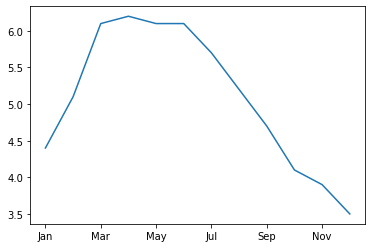

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
ind = ['Jan','Feb','Mar', 'Apr','May','Jun','Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
s7 = pd.Series(temperatures, name="Temperature", index =ind )
s7.plot()
plt.show()

NB The warning is  being caused by pandas' internal plot function code.

We'll ignore it.

There are *many* options for plotting your data. It is not necessary to list them all here: if you need a particular type of plot (histograms, pie charts, etc.), just look for it in the excellent [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) section of pandas' documentation, and look at the example code.

# Handling time
Many datasets have timestamps, and pandas is awesome at manipulating such data:
* it can represent periods (such as 2016Q3) and frequencies (such as "monthly"),
* it can convert periods to actual timestamps, and *vice versa*,
* it can resample data and aggregate values any way you like,
* it can handle timezones.

## Time range
Let's start by creating a time series using `timerange`. This returns a `DatetimeIndex` containing one datetime per hour for 12 hours starting on October 29th 2016 at 5:30pm.

In [19]:
list(range(3,20,2))

[3, 5, 7, 9, 11, 13, 15, 17, 19]

In [20]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

This `DatetimeIndex` may be used as an index in a `Series`:

In [21]:
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

Let's plot this series:

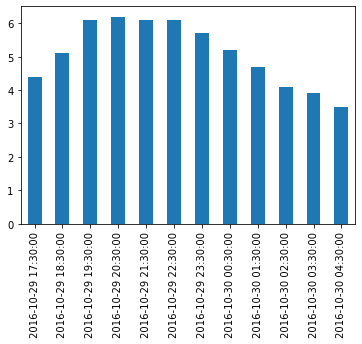

In [22]:
temp_series.plot(kind="bar")

#plt.grid(True)
plt.show()

## Resampling
Pandas let's us resample a time series very simply. Just call the `resample` method and specify a new frequency:

In [23]:
temp_series_freq_2H = temp_series.resample("2H").mean()
temp_series_freq_2H

2016-10-29 16:00:00    4.40
2016-10-29 18:00:00    5.60
2016-10-29 20:00:00    6.15
2016-10-29 22:00:00    5.90
2016-10-30 00:00:00    4.95
2016-10-30 02:00:00    4.00
2016-10-30 04:00:00    3.50
Freq: 2H, dtype: float64

Let's take a look at the result:

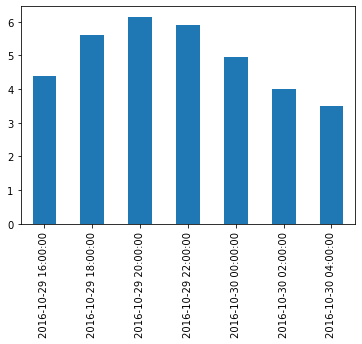

In [24]:
temp_series_freq_2H.plot(kind="bar")
plt.show()

Note how the values have automatically been aggregated into 2-hour periods. If we look at the 6-8pm period, for example, we had a value of `5.1` at 6:30pm, and `6.1` at 7:30pm. After resampling, we just have one value of `5.6`, which is the mean of `5.1` and `6.1`. Computing the mean is the default behavior, but it is also possible to use a different aggregation function, for example we can decide to keep the minimum value of each period:

In [25]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

## Upsampling and interpolation
This was an example of downsampling. We can also upsample (ie. increase the frequency), but this creates holes in our data:

In [27]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate()
temp_series_freq_15min.head(n=10) # `head` displays the top n values

2016-10-29 17:30:00    4.400
2016-10-29 17:45:00    4.575
2016-10-29 18:00:00    4.750
2016-10-29 18:15:00    4.925
2016-10-29 18:30:00    5.100
2016-10-29 18:45:00    5.350
2016-10-29 19:00:00    5.600
2016-10-29 19:15:00    5.850
2016-10-29 19:30:00    6.100
2016-10-29 19:45:00    6.125
Freq: 15T, dtype: float64

One solution is to fill the gaps by interpolating. We just call the `interpolate` method. The default is to use linear interpolation, but we can also select another method, such as cubic interpolation:

In [28]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.452911
2016-10-29 18:00:00    4.605113
2016-10-29 18:15:00    4.829758
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.388992
2016-10-29 19:00:00    5.669887
2016-10-29 19:15:00    5.915839
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.203621
Freq: 15T, dtype: float64

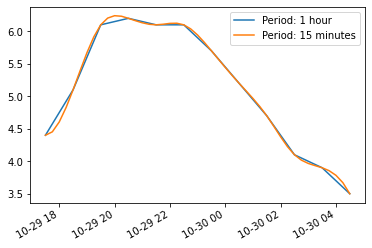

In [29]:
temp_series.plot(label="Period: 1 hour")
temp_series_freq_15min.plot(label="Period: 15 minutes")
plt.legend()
plt.show()

## Timezones
By default datetimes are *naive*: they are not aware of timezones, so 2016-10-30 02:30 might mean October 30th 2016 at 2:30am in Paris or in New York. We can make datetimes timezone *aware* by calling the `tz_localize` method:

In [30]:
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

In [31]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    6.1
2016-10-29 22:30:00-04:00    6.1
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
dtype: float64

Note that `-04:00` is now appended to all the datetimes. This means that these datetimes refer to [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) - 4 hours.

We can convert these datetimes to Paris time like this:

In [32]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
dtype: float64

You may have noticed that the UTC offset changes from `+02:00` to `+01:00`: this is because France switches to winter time at 3am that particular night (time goes back to 2am). Notice that 2:30am occurs twice! Let's go back to a naive representation (if you log some data hourly using local time, without storing the timezone, you might get something like this):

In [33]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

2016-10-29 23:30:00    4.4
2016-10-30 00:30:00    5.1
2016-10-30 01:30:00    6.1
2016-10-30 02:30:00    6.2
2016-10-30 02:30:00    6.1
2016-10-30 03:30:00    6.1
2016-10-30 04:30:00    5.7
2016-10-30 05:30:00    5.2
2016-10-30 06:30:00    4.7
2016-10-30 07:30:00    4.1
2016-10-30 08:30:00    3.9
2016-10-30 09:30:00    3.5
dtype: float64

Now `02:30` is really ambiguous. If we try to localize these naive datetimes to the Paris timezone, we get an error:

In [34]:
try:
    temp_series_paris_naive.tz_localize("Europe/Paris")
except Exception as e:
    print(type(e))
    print(e)

<class 'pytz.exceptions.AmbiguousTimeError'>
Cannot infer dst time from 2016-10-30 02:30:00, try using the 'ambiguous' argument


Fortunately using the `ambiguous` argument we can tell pandas to infer the right DST (Daylight Saving Time) based on the order of the ambiguous timestamps:

In [35]:
temp_series_paris_naive.tz_localize("Europe/Paris", ambiguous="infer")

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
dtype: float64

## Periods
The `period_range` function returns a `PeriodIndex` instead of a `DatetimeIndex`. For example, let's get all quarters in 2016 and 2017:

In [36]:
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

Adding a number `N` to a `PeriodIndex` shifts the periods by `N` times the `PeriodIndex`'s frequency:

In [37]:
quarters + 3

PeriodIndex(['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3'],
            dtype='period[Q-DEC]', freq='Q-DEC')

The `asfreq` method lets us change the frequency of the `PeriodIndex`. All periods are lengthened or shortened accordingly. For example, let's convert all the quarterly periods to monthly periods (zooming in):

In [38]:
quarters.asfreq("M")

PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]', freq='M')

By default, the `asfreq` zooms on the end of each period. We can tell it to zoom on the start of each period instead:

In [39]:
quarters.asfreq("M", how="start")

PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10'],
            dtype='period[M]', freq='M')

And we can zoom out:

In [40]:
quarters.asfreq("A")

PeriodIndex(['2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017'], dtype='period[A-DEC]', freq='A-DEC')

Of course we can create a `Series` with a `PeriodIndex`:

In [41]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index = quarters)
quarterly_revenue

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

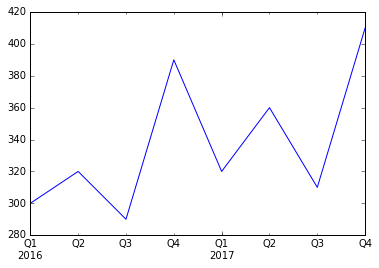

In [ ]:
quarterly_revenue.plot(kind="line")
plt.show()

We can convert periods to timestamps by calling `to_timestamp`. By default this will give us the first day of each period, but by setting `how` and `freq`, we can get the last hour of each period:

In [42]:
last_hours = quarterly_revenue.to_timestamp(how="end", freq="H")
last_hours

2016-03-31 23:59:59.999999999    300
2016-06-30 23:59:59.999999999    320
2016-09-30 23:59:59.999999999    290
2016-12-31 23:59:59.999999999    390
2017-03-31 23:59:59.999999999    320
2017-06-30 23:59:59.999999999    360
2017-09-30 23:59:59.999999999    310
2017-12-31 23:59:59.999999999    410
dtype: int64

And back to periods by calling `to_period`:

In [43]:
last_hours.to_period()

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

Pandas also provides many other time-related functions that we recommend you check out in the [documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html). To whet your appetite, here is one way to get the last business day of each month in 2016, at 9am:

In [44]:
months_2016 = pd.period_range("2016", periods=12, freq="M")
one_day_after_last_days = months_2016.asfreq("D") + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("H") + 9

PeriodIndex(['2016-01-29 09:00', '2016-02-29 09:00', '2016-03-31 09:00',
             '2016-04-29 09:00', '2016-05-31 09:00', '2016-06-30 09:00',
             '2016-07-29 09:00', '2016-08-31 09:00', '2016-09-30 09:00',
             '2016-10-31 09:00', '2016-11-30 09:00', '2016-12-30 09:00'],
            dtype='period[H]', freq='H')

# `DataFrame` objects
A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. You can see `DataFrame`s as dictionaries of `Series`.

## Creating a `DataFrame`:  Dataframe constructor
You can create a DataFrame by passing a dictionary of `Series` objects:

In [45]:
import pandas as pd
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


Above, We thought of a `Series`
as a dictionary for which the index provided the keys.
A DataFrame can be thought of as a dictionary that
has Series as its values, so, roughly, a dictionary of dictionaries.

A few things to note:
* the `Series` were automatically aligned based on their index,
  so the series instances that function as part of
  a `DataFrame` all have the same index.
  
* missing values are represented as `NaN`,
* `Series` names are ignored (the name `"year"` was dropped),
* `DataFrame`s are displayed nicely in Jupyter notebooks, woohoo!

You can access columns pretty much as you would expect. They are returned as `Series` objects:

In [49]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

You can also get multiple columns at once:

In [50]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [61]:
people['children']

alice      NaN
bob        3.0
charles    0.0
Name: children, dtype: float64

1.  Note how the `Nan` came about.
2.  Note the crucial difference between `Nan` and 0.

Here is what motivates the dictionary of dictionaries analogy:

In [64]:
people['children']['bob']

3.0

Further motivatiomn: it is possible to create a `DataFrame` with a dictionary (or list) of dictionaries (or list):

In [65]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


If you pass a list of columns and/or index row labels to the `DataFrame` constructor, it will guarantee that these columns and/or rows will exist, in that order, and no other column/row will exist. Let's illustrate through a data source with
excess information:

In [7]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


So no children or hobby columns. 

In addition, the `height` column  exists even though our dictionary source
provided no  values for it.

Another convenient way to create a `DataFrame` is to pass all the values to the constructor as an `ndarray`, or a list of lists, and specify the column names and row index labels separately:

In [9]:
import numpy as np

# 3 x 4 array
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
# we need 4 column names, and a n index of length 3
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


Instead of an `ndarray`, you can also pass a `DataFrame` object:

In [ ]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3


Note this is a very handy way of creating a new frame 
with fewer rows and columns, throwing away data you don't want.

## Multi-indexing
If all columns are tuples of the same size, then they are understood as a multi-index. The same goes for row index labels. For example:

In [51]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

You can now get a `DataFrame` containing all the `"public"` columns very simply:

In [52]:
d5["public"]

birthyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

In [53]:
d5["public", "hobby"]  # Same result as d4["public"]["hobby"]

Paris   alice       Biking
        bob        Dancing
London  charles        NaN
Name: (public, hobby), dtype: object

In [54]:
d5['hobby']

KeyError: 'hobby'

## Dropping a level
Let's look at `d5` again:

In [ ]:
d5

private           public         
               children weight birthyear    hobby
London charles        0    112      1992      NaN
Paris  alice        NaN     68      1985   Biking
       bob            3     83      1984  Dancing

There are two levels of columns, and two levels of indices. We can drop a column level by calling `droplevel` (the same goes for indices):

In [ ]:
d5.columns = d5.columns.droplevel(level = 0)
d5

children  weight  birthyear    hobby
London charles         0     112       1992      NaN
Paris  alice         NaN      68       1985   Biking
       bob             3      83       1984  Dancing

## Transposing
You can swap columns and indices using the `T` attribute:

In [ ]:
d6 = d5.T
d6

London   Paris         
          charles   alice      bob
children        0     NaN        3
weight        112      68       83
birthyear    1992    1985     1984
hobby         NaN  Biking  Dancing

## Stacking and unstacking levels
Calling the `stack` method will push the lowest column level after the lowest index:

In [ ]:
d7 = d6.stack()
d7

London    Paris
children  bob        NaN        3
          charles      0      NaN
weight    alice      NaN       68
          bob        NaN       83
          charles    112      NaN
birthyear alice      NaN     1985
          bob        NaN     1984
          charles   1992      NaN
hobby     alice      NaN   Biking
          bob        NaN  Dancing

Note that many `NaN` values appeared. This makes sense because many new combinations did not exist before (eg. there was no `bob` in `London`).

Calling `unstack` will do the reverse, once again creating many `NaN` values.

In [ ]:
d8 = d7.unstack()
d8

London                Paris                 
           alice  bob charles   alice      bob charles
children     NaN  NaN       0     NaN        3     NaN
weight       NaN  NaN     112      68       83     NaN
birthyear    NaN  NaN    1992    1985     1984     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN

If we call `unstack` again, we end up with a `Series` object:

In [ ]:
d9 = d8.unstack()
d9

London  alice    children         NaN
                 weight           NaN
                 birthyear        NaN
                 hobby            NaN
        bob      children         NaN
                 weight           NaN
                 birthyear        NaN
                 hobby            NaN
        charles  children           0
                 weight           112
                 birthyear       1992
                 hobby            NaN
Paris   alice    children         NaN
                 weight            68
                 birthyear       1985
                 hobby         Biking
        bob      children           3
                 weight            83
                 birthyear       1984
                 hobby        Dancing
        charles  children         NaN
                 weight           NaN
                 birthyear        NaN
                 hobby            NaN
dtype: object

The `stack` and `unstack` methods let you select the `level` to stack/unstack. You can even stack/unstack multiple levels at once:

In [ ]:
d10 = d9.unstack(level = (0,1))
d10

London                Paris                 
           alice  bob charles   alice      bob charles
children     NaN  NaN       0     NaN        3     NaN
weight       NaN  NaN     112      68       83     NaN
birthyear    NaN  NaN    1992    1985     1984     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN

## Most methods return modified copies
As you may have noticed, the `stack` and `unstack` methods do not modify the object they apply to. Instead, they work on a copy and return that copy. This is true of most methods in pandas.

## Accessing rows
Let's go back to the `people` `DataFrame`:

In [ ]:
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


Columns come first.

In [55]:
people['birthyear']

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

Rows cant come first.

In [56]:
people['alice']

KeyError: 'alice'

The `loc` attribute lets you access rows instead of columns. The result is `Series` object in which the `DataFrame`'s column names are mapped to row index labels:

In [ ]:
people.loc["charles"]

birthyear    1992
children        0
hobby         NaN
weight        112
Name: charles, dtype: object

You can also access rows by integer location using the `iloc` attribute:

In [ ]:
people.iloc[2]

birthyear    1992
children        0
hobby         NaN
weight        112
Name: charles, dtype: object

You can also get a slice of rows, and this returns a `DataFrame` object:

In [ ]:
people.iloc[1:3]

,birthyear,children,hobby,weight
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


Finally, similar to a numoy 2D array,
you can pass a boolean array to get the matching rows:

In [ ]:
people[np.array([True, False, True])]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
charles,1992,0,NaN,112


This is most useful when you use a boolean constraint to create the Boolean array.

In [ ]:
people[people["birthyear"] < 1990]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83


And what we learned about numpy comes into use!

## Adding and removing columns
You can generally treat `DataFrame` objects like dictionaries of `Series`, so the following work fine:

In [ ]:
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


In [ ]:
people["age"] = 2016 - people["birthyear"]  # adds a new column "age"

Let's slow this down and look at the steps.

`people["birthyear"]` is a `Series` 

In [60]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

A `Series` is like a numpy array, so broadcasting works.

In [58]:
2016 - people["birthyear"]

alice      31
bob        32
charles    24
Name: birthyear, dtype: int64

A new series with the data we want.

In [ ]:
people["over 30"] = people["age"] > 30      # adds another column "over 30"
# Removing  birthyears column from people but keeping data
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,31,True
bob,Dancing,83,32,True
charles,NaN,112,24,False


In [ ]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

When you add a new colum, it must have the same number of rows. Missing rows are filled with NaN, and extra rows are ignored:

In [ ]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people

,hobby,weight,age,over 30,pets
alice,Biking,68,31,True,NaN
bob,Dancing,83,32,True,0
charles,NaN,112,24,False,5


When adding a new column, it is added at the end (on the right) by default. You can also insert a column anywhere else using the `insert` method:

In [ ]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,31,True,NaN
bob,Dancing,181,83,32,True,0
charles,NaN,185,112,24,False,5


## Assigning new columns
You can also create new columns by calling the `assign` method. Note that this returns a new `DataFrame` object, the original is not modified:

In [ ]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
alice,Biking,172,68,31,True,NaN,22.985398,False
bob,Dancing,181,83,32,True,0,25.335002,False
charles,NaN,185,112,24,False,5,32.724617,True


Note that you cannot access columns created within the same assignment:

In [ ]:
try:
    people.assign(
        body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
        overweight = people["body_mass_index"] > 25
    )
except KeyError as e:
    print("Key error:", e)

Key error: u'body_mass_index'


The solution is to split this assignment in two consecutive assignments:

In [ ]:
d6 = people.assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
d6.assign(overweight = d6["body_mass_index"] > 25)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,31,True,NaN,22.985398,False
bob,Dancing,181,83,32,True,0,25.335002,True
charles,NaN,185,112,24,False,5,32.724617,True


Having to create a temporary variable `d6` is not very convenient. You may want to just chain the assigment calls, but it does not work because the `people` object is not actually modified by the first assignment:

In [ ]:
try:
    (people
         .assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
         .assign(overweight = people["body_mass_index"] > 25)
    )
except KeyError as e:
    print("Key error:", e)

Key error: u'body_mass_index'


But fear not, there is a simple solution. You can pass a function to the `assign` method (typically a `lambda` function), and this function will be called with the `DataFrame` as a parameter:

In [ ]:
(people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,31,True,NaN,22.985398,False
bob,Dancing,181,83,32,True,0,25.335002,True
charles,NaN,185,112,24,False,5,32.724617,True


Problem solved!

## Evaluating an expression
A great feature supported by pandas is expression evaluation. This relies on the `numexpr` library which must be installed.

In [ ]:
people.eval("weight / (height/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

Assignment expressions are also supported, and contrary to the `assign` method, this does not create a copy of the `DataFrame`, instead it directly modifies it:

In [ ]:
people.eval("body_mass_index = weight / (height/100) ** 2")
people

,hobby,height,weight,age,over 30,pets,body_mass_index
alice,Biking,172,68,31,True,NaN,22.985398
bob,Dancing,181,83,32,True,0,25.335002
charles,NaN,185,112,24,False,5,32.724617


You can use a local or global variable in an expression by prefixing it with `'@'`:

In [ ]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold")
people

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,31,True,NaN,22.985398,False
bob,Dancing,181,83,32,True,0,25.335002,False
charles,NaN,185,112,24,False,5,32.724617,True


## Querying a `DataFrame`
The `query` method lets you filter a `DataFrame` based on a query expression:

In [ ]:
people.query("age > 30 and pets == 0")

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
bob,Dancing,181,83,32,True,0,25.335002,False


## Sorting a `DataFrame`
You can sort a `DataFrame` by calling its `sort_index` method. By default it sorts the rows by their index label, in ascending order, but let's reverse the order:

In [ ]:
people.sort_index(ascending=False)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
charles,NaN,185,112,24,False,5,32.724617,True
bob,Dancing,181,83,32,True,0,25.335002,False
alice,Biking,172,68,31,True,NaN,22.985398,False


Note that `sort_index` returned a sorted *copy* of the `DataFrame`. To modify `people` directly, we can set the `inplace` argument to `True`. Also, we can sort the columns instead of the rows by setting `axis=1`:

In [ ]:
people.sort_index(axis=1, inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,31,22.985398,172,Biking,True,False,NaN,68
bob,32,25.335002,181,Dancing,True,False,0,83
charles,24,32.724617,185,NaN,False,True,5,112


To sort the `DataFrame` by the values instead of the labels, we can use `sort_values` and specify the column to sort by:

In [ ]:
people.sort_values(by="age", inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
charles,24,32.724617,185,NaN,False,True,5,112
alice,31,22.985398,172,Biking,True,False,NaN,68
bob,32,25.335002,181,Dancing,True,False,0,83


## Plotting a `DataFrame`
Just like for `Series`, pandas makes it easy to draw nice graphs based on a `DataFrame`.

For example, it is trivial to create a line plot from a `DataFrame`'s data by calling its `plot` method:

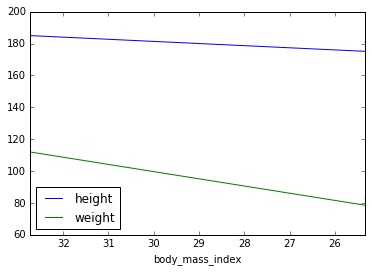

In [ ]:
people.plot(kind = "line", x = "body_mass_index", y = ["height", "weight"])
plt.show()

You can pass extra arguments supported by matplotlib's functions. For example, we can create scatterplot and pass it a list of sizes using the `s` argument of matplotlib's `scatter` function:

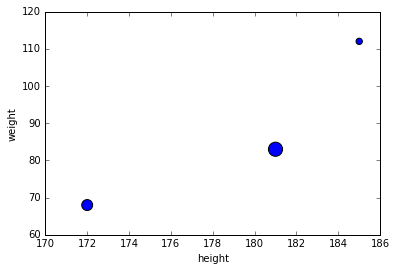

In [ ]:
people.plot(kind = "scatter", x = "height", y = "weight", s=[40, 120, 200])
plt.show()

Again, there are way too many options to list here: the best option is to scroll through the [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) page in pandas' documentation, find the plot you are interested in and look at the example code.

## Operations on `DataFrame`s
Although `DataFrame`s do not try to mimick NumPy arrays, there are a few similarities. Let's create a `DataFrame` to demonstrate this:

In [ ]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


You can apply NumPy mathematical functions on a `DataFrame`: the function is applied to all values:

In [ ]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


Similarly, adding a single value to a `DataFrame` will add that value to all elements in the `DataFrame`. This is called *broadcasting*:

In [ ]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


Of course, the same is true for all other binary operations, including arithmetic (`*`,`/`,`**`...) and conditional (`>`, `==`...) operations:

In [ ]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


Aggregation operations, such as computing the `max`, the `sum` or the `mean` of a `DataFrame`, apply to each column, and you get back a `Series` object:

In [ ]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

The `all` method is also an aggregation operation: it checks whether all values are `True` or not. Let's see during which months all students got a grade greater than `5`:

In [ ]:
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

Most of these functions take an optional `axis` parameter which lets you specify along which axis of the `DataFrame` you want the operation executed. The default is `axis=0`, meaning that the operation is executed vertically (on each column). You can set `axis=1` to execute the operation horizontally (on each row). For example, let's find out which students had all grades greater than `5`:

In [ ]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

The `any` method returns `True` if any value is True. Let's see who got at least one grade 10:

In [ ]:
(grades == 10).any(axis = 1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

If you add a `Series` object to a `DataFrame` (or execute any other binary operation), pandas attempts to broadcast the operation to all *rows* in the `DataFrame`. This only works if the `Series` has the same size as the `DataFrame`s rows. For example, let's substract the `mean` of the `DataFrame` (a `Series` object) from the `DataFrame`:

In [ ]:
grades - grades.mean()  # equivalent to: grades - [7.75, 8.75, 7.50]

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


We substracted `7.75` from all September grades, `8.75` from October grades and `7.50` from November grades. It is equivalent to substracting this `DataFrame`:

In [ ]:
pd.DataFrame([[7.75, 8.75, 7.50]]*4, index=grades.index, columns=grades.columns)

,sep,oct,nov
alice,7.75,8.75,7.5
bob,7.75,8.75,7.5
charles,7.75,8.75,7.5
darwin,7.75,8.75,7.5


If you want to substract the global mean from every grade, here is one way to do it:

In [ ]:
grades - grades.values.mean() # substracts the global mean (8.00) from all grades

,sep,oct,nov
alice,0,0,1
bob,2,1,1
charles,-4,0,-6
darwin,1,2,2


## Automatic alignment
Similar to `Series`, when operating on multiple `DataFrame`s, pandas automatically aligns them by row index label, but also by column names. Let's create a `DataFrame` with bonus points for each person from October to December:

In [ ]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0,NaN,2
colin,NaN,1,0
darwin,0,1,0
charles,3,3,0


In [ ]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9,NaN
charles,NaN,5,11,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11,10,NaN


Looks like the addition worked in some cases but way too many elements are now empty. That's because when aligning the `DataFrame`s, some columns and rows were only present on one side, and thus they were considered missing on the other side (`NaN`). Then adding `NaN` to a number results in `NaN`, hence the result.

## Handling missing data
Dealing with missing data is a frequent task when working with real life data. Pandas offers a few tools to handle missing data.
 
Let's try to fix the problem above. For example, we can decide that missing data should result in a zero, instead of `NaN`. We can replace all `NaN` values by a any value using the `fillna` method:

In [ ]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0,0,0,0
bob,0,0,9,0
charles,0,5,11,0
colin,0,0,0,0
darwin,0,11,10,0


It's a bit unfair that we're setting grades to zero in September, though. Perhaps we should decide that missing grades are missing grades, but missing bonus points should be replaced by zeros:

In [ ]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9,8,8
bob,NaN,9,9,10
charles,NaN,5,11,4
colin,NaN,NaN,NaN,NaN
darwin,NaN,11,10,9


That's much better: although we made up some data, we have not been too unfair.

Another way to handle missing data is to interpolate. Let's look at the `bonus_points` `DataFrame` again:

In [ ]:
bonus_points

,oct,nov,dec
bob,0,NaN,2
colin,NaN,1,0
darwin,0,1,0
charles,3,3,0


Now let's call the `interpolate` method. By default, it interpolates vertically (`axis=0`), so let's tell it to interpolate horizontally (`axis=1`).

In [ ]:
bonus_points.interpolate(axis=1)

,oct,nov,dec
bob,0,1,2
colin,NaN,1,0
darwin,0,1,0
charles,3,3,0


Bob had 0 bonus points in October, and 2 in December. When we interpolate for November, we get the mean: 1 bonus point. Colin had 1 bonus point in November, but we do not know how many bonus points he had in September, so we cannot interpolate, this is why there is still a missing value in October after interpolation. To fix this, we can set the September bonus points to 0 before interpolation.

In [ ]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,sep,oct,nov,dec
bob,0,0.0,1,2
colin,0,0.5,1,0
darwin,0,0.0,1,0
charles,0,3.0,3,0
alice,0,0.0,0,0


Great, now we have reasonable bonus points everywhere. Let's find out the final grades:

In [ ]:
grades + better_bonus_points

,dec,nov,oct,sep
alice,NaN,9,8,8
bob,NaN,10,9,10
charles,NaN,5,11,4
colin,NaN,NaN,NaN,NaN
darwin,NaN,11,10,9


It is slightly annoying that the September column ends up on the right. This is because the `DataFrame`s we are adding do not have the exact same columns (the `grades` `DataFrame` is missing the `"dec"` column), so to make things predictable, pandas orders the final columns alphabetically. To fix this, we can simply add the missing column before adding:

In [ ]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

,sep,oct,nov,dec
alice,8,8,9,NaN
bob,10,9,10,NaN
charles,4,11,5,NaN
colin,NaN,NaN,NaN,NaN
darwin,9,10,11,NaN


There's not much we can do about December and Colin: it's bad enough that we are making up bonus points, but we can't reasonably make up grades (well I guess some teachers probably do). So let's call the `dropna` method to get rid of rows that are full of `NaN`s:

In [ ]:
final_grades_clean = final_grades.dropna(how="all")
final_grades_clean

,sep,oct,nov,dec
alice,8,8,9,NaN
bob,10,9,10,NaN
charles,4,11,5,NaN
darwin,9,10,11,NaN


Now let's remove columns that are full of `NaN`s by setting the `axis` argument to `1`:

In [ ]:
final_grades_clean = final_grades_clean.dropna(axis=1, how="all")
final_grades_clean

,sep,oct,nov
alice,8,8,9
bob,10,9,10
charles,4,11,5
darwin,9,10,11


## Aggregating with `groupby`
Similar to the SQL language, pandas allows grouping your data into groups to run calculations over each group.

First, let's add some extra data about each person so we can group them, and let's go back to the `final_grades` `DataFrame` so we can see how `NaN` values are handled:

In [ ]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing", "Biking"]
final_grades

,sep,oct,nov,dec,hobby
alice,8,8,9,NaN,Biking
bob,10,9,10,NaN,Dancing
charles,4,11,5,NaN,NaN
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9,10,11,NaN,Biking


Now let's group data in this `DataFrame` by hobby:

In [ ]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades

We are ready to compute the average grade per hobby:

In [ ]:
grouped_grades.mean()

,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9,10,NaN
Dancing,10.0,9,10,NaN


That was easy! Note that the `NaN` values have simply been skipped when computing the means.

## Pivot tables
Pandas supports spreadsheet-like [pivot tables](https://en.wikipedia.org/wiki/Pivot_table) that allow quick data summarization. To illustrate this, let's create a simple `DataFrame`:

In [ ]:
bonus_points

,oct,nov,dec
bob,0,NaN,2
colin,NaN,1,0
darwin,0,1,0
charles,3,3,0


In [ ]:
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ["name", "month", "grade"]
more_grades["bonus"] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

,name,month,grade,bonus
0,alice,sep,8,NaN
1,alice,oct,8,NaN
2,alice,nov,9,NaN
3,bob,sep,10,0
4,bob,oct,9,NaN
5,bob,nov,10,2
6,charles,sep,4,3
7,charles,oct,11,3
8,charles,nov,5,0
9,darwin,sep,9,0


Now we can call the `pivot_table` function for this `DataFrame`, asking to group by the `name` column. By default, `pivot_table` computes the `mean` of each numeric column:

In [ ]:
pd.pivot_table(more_grades, index="name")

,bonus,grade
name,,
alice,NaN,8.333333
bob,1.000000,9.666667
charles,2.000000,6.666667
darwin,0.333333,10.000000


We can change the aggregation function by setting the `aggfunc` attribute, and we can also specify the list of columns whose values will be aggregated:

In [ ]:
pd.pivot_table(more_grades, index="name", values=["grade","bonus"], aggfunc=np.max)

,bonus,grade
name,,
alice,NaN,9
bob,2,10
charles,3,11
darwin,1,11


We can also specify the `columns` to aggregate over horizontally, and request the grand totals for each row and column by setting `margins=True`:

In [ ]:
pd.pivot_table(more_grades, index="name", values="grade", columns="month", margins=True)

month,nov,oct,sep,All
name,,,,
alice,9.00,8.0,8.00,8.333333
bob,10.00,9.0,10.00,9.666667
charles,5.00,11.0,4.00,6.666667
darwin,11.00,10.0,9.00,10.000000
All,8.75,9.5,7.75,8.666667


Finally, we can specify multiple index or column names, and pandas will create multi-level indices:

In [ ]:
pd.pivot_table(more_grades, index=("name", "month"), margins=True)

bonus      grade
name    month                  
alice   nov      NaN   9.000000
        oct      NaN   8.000000
        sep      NaN   8.000000
bob     nov    2.000  10.000000
        oct      NaN   9.000000
        sep    0.000  10.000000
charles nov    0.000   5.000000
        oct    3.000  11.000000
        sep    3.000   4.000000
darwin  nov    0.000  11.000000
        oct    1.000  10.000000
        sep    0.000   9.000000
All            1.125   8.666667

## Overview functions
When dealing with large `DataFrames`, it is useful to get a quick overview of its content. Pandas offers a few functions for this. First, let's create a large `DataFrame` with a mix of numeric values, missing values and text values. Notice how Jupyter displays only the corners of the `DataFrame`:

In [ ]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "Blabla")
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11,44,Blabla,99,NaN,88,22,165,143,...,11,NaN,11,44,99,NaN,88,22,165,143
1,11,22,55,Blabla,110,NaN,99,33,NaN,154,...,22,11,22,55,110,NaN,99,33,NaN,154
2,22,33,66,Blabla,121,11,110,44,NaN,165,...,33,22,33,66,121,11,110,44,NaN,165
3,33,44,77,Blabla,132,22,121,55,11,NaN,...,44,33,44,77,132,22,121,55,11,NaN
4,44,55,88,Blabla,143,33,132,66,22,NaN,...,55,44,55,88,143,33,132,66,22,NaN
5,55,66,99,Blabla,154,44,143,77,33,11,...,66,55,66,99,154,44,143,77,33,11
6,66,77,110,Blabla,165,55,154,88,44,22,...,77,66,77,110,165,55,154,88,44,22
7,77,88,121,Blabla,NaN,66,165,99,55,33,...,88,77,88,121,NaN,66,165,99,55,33
8,88,99,132,Blabla,NaN,77,NaN,110,66,44,...,99,88,99,132,NaN,77,NaN,110,66,44
9,99,110,143,Blabla,11,88,NaN,121,77,55,...,110,99,110,143,11,88,NaN,121,77,55


The `head` method returns the top 5 rows:

In [ ]:
large_df.head()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11,44,Blabla,99,NaN,88,22,165,143,...,11,NaN,11,44,99,NaN,88,22,165,143
1,11,22,55,Blabla,110,NaN,99,33,NaN,154,...,22,11,22,55,110,NaN,99,33,NaN,154
2,22,33,66,Blabla,121,11,110,44,NaN,165,...,33,22,33,66,121,11,110,44,NaN,165
3,33,44,77,Blabla,132,22,121,55,11,NaN,...,44,33,44,77,132,22,121,55,11,NaN
4,44,55,88,Blabla,143,33,132,66,22,NaN,...,55,44,55,88,143,33,132,66,22,NaN


Of course there's also a `tail` function to view the bottom 5 rows. You can pass the number of rows you want:

In [ ]:
large_df.tail(n=2)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9998,22,33,66,Blabla,121,11,110,44,NaN,165,...,33,22,33,66,121,11,110,44,NaN,165
9999,33,44,77,Blabla,132,22,121,55,11,NaN,...,44,33,44,77,132,22,121,55,11,NaN


The `info` method prints out a summary of each columns contents:

In [ ]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 27 columns):
A            8823 non-null float64
B            8824 non-null float64
C            8824 non-null float64
some_text    10000 non-null object
D            8824 non-null float64
E            8822 non-null float64
F            8824 non-null float64
G            8824 non-null float64
H            8822 non-null float64
I            8823 non-null float64
J            8823 non-null float64
K            8822 non-null float64
L            8824 non-null float64
M            8824 non-null float64
N            8822 non-null float64
O            8824 non-null float64
P            8824 non-null float64
Q            8824 non-null float64
R            8823 non-null float64
S            8824 non-null float64
T            8824 non-null float64
U            8824 non-null float64
V            8822 non-null float64
W            8824 non-null float64
X            8824 non-null float64
Y            8822

Finally, the `describe` method gives a nice overview of the main aggregated values over each column:
* `count`: number of non-null (not NaN) values
* `mean`: mean of non-null values
* `std`: [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of non-null values
* `min`: minimum of non-null values
* `25%`, `50%`, `75%`: 25th, 50th and 75th [percentile](https://en.wikipedia.org/wiki/Percentile) of non-null values
* `max`: maximum of non-null values

In [ ]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


# Saving & loading
Pandas can save `DataFrame`s to various backends, including file formats such as CSV, Excel, JSON, HTML and HDF5, or to a SQL database. Let's create a `DataFrame` to demonstrate this:

In [ ]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby","weight","birthyear","children"],
    index=["alice", "bob"]
)
my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3


## Saving
Let's save it to CSV, HTML and JSON:

In [ ]:
my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")

Done! Let's take a peek at what was saved:

In [ ]:
for filename in ("my_df.csv", "my_df.html", "my_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()


# my_df.csv
,hobby,weight,birthyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


# my_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hobby</th>
      <th>weight</th>
      <th>birthyear</th>
      <th>children</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Biking</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3</td>
    </tr>
  </tbody>
</table>

# my_df.json
{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birthyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}



Note that the index is saved as the first column (with no name) in a CSV file, as `<th>` tags in HTML and as keys in JSON.

Saving to other formats works very similarly, but some formats require extra libraries to be installed. For example, saving to Excel requires the openpyxl library:

In [ ]:
try:
    my_df.to_excel("my_df.xlsx", sheet_name='People')
except ImportError as e:
    print(e)

No module named openpyxl


## Loading
Now let's load our CSV file back into a `DataFrame`:

In [ ]:
my_df_loaded = pd.read_csv("my_df.csv", index_col=0)
my_df_loaded

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3


As you might guess, there are similar `read_json`, `read_html`, `read_excel` functions as well.  We can also read data straight from the Internet. For example, let's load all U.S. cities from [simplemaps.com](http://simplemaps.com/):

In [ ]:
us_cities = None
try:
    csv_url = "http://simplemaps.com/files/cities.csv"
    us_cities = pd.read_csv(csv_url, index_col=0)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
us_cities

,state,city,lat,lng
zip,,,,
35004,AL,Acmar,33.584132,-86.515570
35005,AL,Adamsville,33.588437,-86.959727
35006,AL,Adger,33.434277,-87.167455
35007,AL,Keystone,33.236868,-86.812861
35010,AL,New Site,32.941445,-85.951086


There are more options available, in particular regarding datetime format. Check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/io.html) for more details.

# Combining `DataFrame`s

## SQL-like joins
One powerful feature of pandas is it's ability to perform SQL-like joins on `DataFrame`s. Various types of joins are supported: inner joins, left/right outer joins and full joins. To illustrate this, let's start by creating a couple simple `DataFrame`s:

In [ ]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [ ]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


Now let's join these `DataFrame`s using the `merge` function:

In [ ]:
pd.merge(left=city_loc, right=city_pop, on="city")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


Note that both `DataFrame`s have a column named `state`, so in the result they got renamed to `state_x` and `state_y`.

Also, note that Cleveland, Salt Lake City and Houston were dropped because they don't exist in *both* `DataFrame`s. This is the equivalent of a SQL `INNER JOIN`. If you want a `FULL OUTER JOIN`, where no city gets dropped and `NaN` values are added, you must specify `how="outer"`:

In [ ]:
all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
all_cities

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,Houston,NaN,NaN,2242193,Texas


Of course `LEFT OUTER JOIN` is also available by setting `how="left"`: only the cities present in the left `DataFrame` end up in the result. Similarly, with `how="right"` only cities in the right `DataFrame` appear in the result. For example:

In [ ]:
pd.merge(left=city_loc, right=city_pop, on="city", how="right")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


If the key to join on is actually in one (or both) `DataFrame`'s index, you must use `left_index=True` and/or `right_index=True`. If the key column names differ, you must use `left_on` and `right_on`. For example:

In [ ]:
city_pop2 = city_pop.copy()
city_pop2.columns = ["population", "name", "state"]
pd.merge(left=city_loc, right=city_pop2, left_on="city", right_on="name")

,state_x,city,lat,lng,population,name,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New-York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


## Concatenation
Rather than joining `DataFrame`s, we may just want to concatenate them. That's what `concat` is for:

In [ ]:
result_concat = pd.concat([city_loc, city_pop])
result_concat

,city,lat,lng,population,state
0,San Francisco,37.781334,-122.416728,NaN,CA
1,New York,40.705649,-74.008344,NaN,NY
2,Miami,25.791100,-80.320733,NaN,FL
3,Cleveland,41.473508,-81.739791,NaN,OH
4,Salt Lake City,40.755851,-111.896657,NaN,UT
3,San Francisco,NaN,NaN,808976,California
4,New York,NaN,NaN,8363710,New-York
5,Miami,NaN,NaN,413201,Florida
6,Houston,NaN,NaN,2242193,Texas


Note that this operation aligned the data horizontally (by columns) but not vertically (by rows). In this example, we end up with multiple rows having the same index (eg. 3). Pandas handles this rather gracefully:

In [ ]:
result_concat.loc[3]

,city,lat,lng,population,state
3,Cleveland,41.473508,-81.739791,NaN,OH
3,San Francisco,NaN,NaN,808976,California


Or you can tell pandas to just ignore the index:

In [ ]:
pd.concat([city_loc, city_pop], ignore_index=True)

,city,lat,lng,population,state
0,San Francisco,37.781334,-122.416728,NaN,CA
1,New York,40.705649,-74.008344,NaN,NY
2,Miami,25.791100,-80.320733,NaN,FL
3,Cleveland,41.473508,-81.739791,NaN,OH
4,Salt Lake City,40.755851,-111.896657,NaN,UT
5,San Francisco,NaN,NaN,808976,California
6,New York,NaN,NaN,8363710,New-York
7,Miami,NaN,NaN,413201,Florida
8,Houston,NaN,NaN,2242193,Texas


Notice that when a column does not exist in a `DataFrame`, it acts as if it was filled with `NaN` values. If we set `join="inner"`, then only columns that exist in *both* `DataFrame`s are returned:

In [ ]:
pd.concat([city_loc, city_pop], join="inner")

,city,state
0,San Francisco,CA
1,New York,NY
2,Miami,FL
3,Cleveland,OH
4,Salt Lake City,UT
3,San Francisco,California
4,New York,New-York
5,Miami,Florida
6,Houston,Texas


You can concatenate `DataFrame`s horizontally instead of vertically by setting `axis=1`:

In [ ]:
pd.concat([city_loc, city_pop], axis=1)

,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710,New York,New-York
5,NaN,NaN,NaN,NaN,413201,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193,Houston,Texas


In this case it really does not make much sense because the indices do not align well (eg. Cleveland and San Francisco end up on the same row, because they shared the index label `3`). So let's reindex the `DataFrame`s by city name before concatenating:

In [ ]:
pd.concat([city_loc.set_index("city"), city_pop.set_index("city")], axis=1)

,state,lat,lng,population,state
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Houston,NaN,NaN,NaN,2242193,Texas
Miami,FL,25.791100,-80.320733,413201,Florida
New York,NY,40.705649,-74.008344,8363710,New-York
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
San Francisco,CA,37.781334,-122.416728,808976,California


This looks a lot like a `FULL OUTER JOIN`, except that the `state` columns were not renamed to `state_x` and `state_y`, and the `city` column is now the index.

The `append` method is a useful shorthand for concatenating `DataFrame`s vertically:

In [ ]:
city_loc.append(city_pop)

,city,lat,lng,population,state
0,San Francisco,37.781334,-122.416728,NaN,CA
1,New York,40.705649,-74.008344,NaN,NY
2,Miami,25.791100,-80.320733,NaN,FL
3,Cleveland,41.473508,-81.739791,NaN,OH
4,Salt Lake City,40.755851,-111.896657,NaN,UT
3,San Francisco,NaN,NaN,808976,California
4,New York,NaN,NaN,8363710,New-York
5,Miami,NaN,NaN,413201,Florida
6,Houston,NaN,NaN,2242193,Texas


As always in pandas, the `append` method does *not* actually modify `city_loc`: it works on a copy and returns the modified copy.

# Categories
It is quite frequent to have values that represent categories, for example `1` for female and `2` for male, or `"A"` for Good, `"B"` for Average, `"C"` for Bad. These categorical values can be hard to read and cumbersome to handle, but fortunately pandas makes it easy. To illustrate this, let's take the `city_pop` `DataFrame` we created earlier, and add a column that represents a category:

In [ ]:
city_eco = city_pop.copy()
city_eco["eco_code"] = [17, 17, 34, 20]
city_eco

,population,city,state,eco_code
3,808976,San Francisco,California,17
4,8363710,New York,New-York,17
5,413201,Miami,Florida,34
6,2242193,Houston,Texas,20


Right now the `eco_code` column is full of apparently meaningless codes. Let's fix that. First, we will create a new categorical column based on the `eco_code`s:

In [ ]:
city_eco["economy"] = city_eco["eco_code"].astype('category')
city_eco["economy"].cat.categories

Int64Index([17, 20, 34], dtype='int64')

Now we can give each category a meaningful name:

In [ ]:
city_eco["economy"].cat.categories = ["Finance", "Energy", "Tourism"]
city_eco

,population,city,state,eco_code,economy
3,808976,San Francisco,California,17,Finance
4,8363710,New York,New-York,17,Finance
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy


Note that categorical values are sorted according to their categorical order, *not* their alphabetical order:

In [ ]:
city_eco.sort_values(by="economy", ascending=False)

,population,city,state,eco_code,economy
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy
4,8363710,New York,New-York,17,Finance
3,808976,San Francisco,California,17,Finance


# What next?
As you probably noticed by now, pandas is quite a large library with *many* features. Although we went through the most important features, there is still a lot to discover. Probably the best way to learn more is to get your hands dirty with some real-life data. It is also a good idea to go through pandas' excellent [documentation](http://pandas.pydata.org/pandas-docs/stable/index.html), in particular the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html).